# Predicting House Prices: A Data Science Project

### Introduction
In this project, we explore the factors that influence house prices using the Ames Housing dataset. The goal is to build a predictive model that can estimate house prices based on various features like location, size, and quality of the house.

### Step 1: Data Loading and Cleaning

In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = 'AmesHousing.csv'
data = pd.read_csv(url)

# Display first few rows
data.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Step 2: Data Cleaning

In [16]:
# Display the first few rows of the dataset
print("Initial Dataset:")
print(data.head())

# Cleaning the dataset (handling missing values, etc.)
def clean_data(df):
    # Fill missing values with the median for numeric columns
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        df[col].fillna(df[col].median(), inplace=True)
        
    # Convert categorical variables to dummy/indicator variables
    df = pd.get_dummies(df, drop_first=True)
    
    return df

# Clean the data
cleaned_data = clean_data(data)

Initial Dataset:
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  Sal

C:\Users\prashant.bidarakundi\AppData\Local\Temp\ipykernel_48060\433820825.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


### Step 3: Exploratory Data Analysis (EDA)


Correlation Matrix:
                    Order       PID  MS SubClass  Lot Frontage  Lot Area  \
Order            1.000000  0.173593     0.011797     -0.006102  0.031354   
PID              0.173593  1.000000    -0.001281     -0.087894  0.034868   
MS SubClass      0.011797 -0.001281     1.000000     -0.391497 -0.204613   
Lot Frontage    -0.006102 -0.087894    -0.391497      1.000000  0.362758   
Lot Area         0.031354  0.034868    -0.204613      0.362758  1.000000   
Overall Qual    -0.048500 -0.263147     0.039419      0.198917  0.097188   
Overall Cond    -0.011054  0.104451    -0.067349     -0.067140 -0.034759   
Year Built      -0.052319 -0.343388     0.036579      0.114341  0.023258   
Year Remod/Add  -0.075566 -0.157111     0.043397      0.086139  0.021682   
Mas Vnr Area    -0.031045 -0.225672     0.003634      0.201685  0.125950   
BsmtFin SF 1    -0.032313 -0.098412    -0.060019      0.198161  0.191574   
BsmtFin SF 2    -0.002758 -0.001245    -0.070847      0.039157  0.0

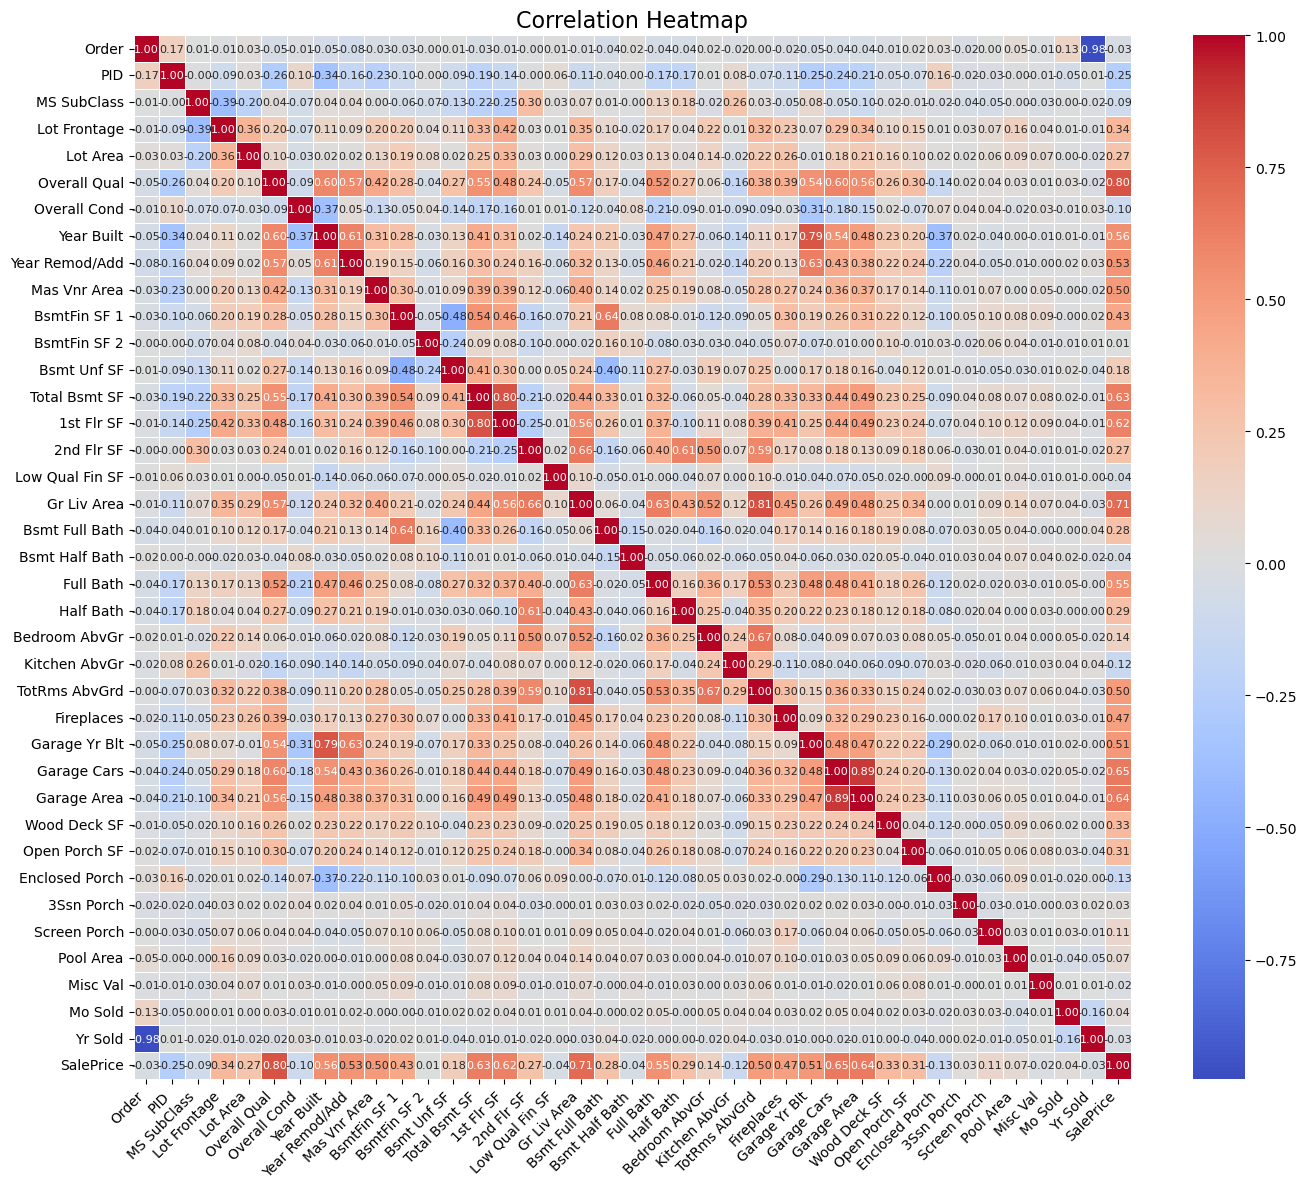

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_heatmap(df):
    """
    Generates and displays the correlation matrix and a heatmap for the numeric columns of the given DataFrame.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data for which the correlation matrix is to be computed.
    
    Returns:
    -------
    None
        This function does not return any value. It directly displays a heatmap of the correlation matrix.

    Example:
    --------
    >>> import pandas as pd
    >>> data = pd.read_csv('AmesHousing.csv')
    >>> cleaned_data = clean_data(data)
    >>> plot_correlation_heatmap(cleaned_data)
    """
    
    # Ensure you have a dataset with only numeric columns
    numeric_data = df.select_dtypes(include=['float64', 'int64'])

    # Generate and check the correlation matrix
    correlation_matrix = numeric_data.corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    # Plot the correlation heatmap
    plt.figure(figsize=(14, 12))  # Increased figure size for better visibility
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                annot_kws={"size": 8},  # Smaller font size for annotations
                linewidths=0.5)  # Add separation lines between cells
    plt.title('Correlation Heatmap', fontsize=16)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.yticks(rotation=0)  # Keep y-axis labels horizontal
    plt.tight_layout()  # Adjust layout to make room for labels
    plt.show()

# Example usage:
# Load dataset and clean it as before
file_path = 'AmesHousing.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)
cleaned_data = clean_data(data)

# Call the function to plot the correlation heatmap
plot_correlation_heatmap(cleaned_data)


C:\Users\prashant.bidarakundi\AppData\Local\Temp\ipykernel_48060\236515482.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Linear Regression RMSE: 28882.22


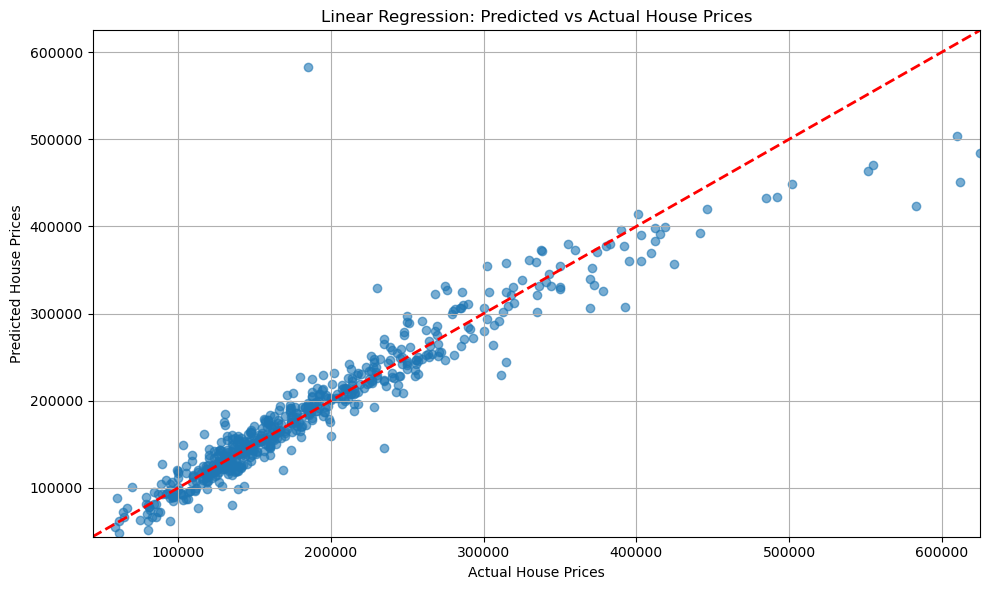

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def linear_regression_model(file_path, target_variable):
    """
    Performs Linear Regression on the dataset specified by the file path and plots predicted vs actual house prices.

    Parameters:
    ----------
    file_path : str
        The file path to the CSV dataset containing the housing data.
        
    target_variable : str
        The name of the target variable in the dataset (e.g., 'SalePrice').
    
    Returns:
    -------
    float
        The Root Mean Squared Error (RMSE) of the Linear Regression model.

    Example:
    --------
    >>> rmse = linear_regression_model('AmesHousing.csv', 'SalePrice')
    >>> print(f"RMSE: {rmse:.2f}")
    """
    
    # Load dataset
    data = pd.read_csv(file_path)

    # Cleaning the dataset (handling missing values, etc.)
    def clean_data(df):
        # Fill missing values with the median for numeric columns
        for col in df.select_dtypes(include=['float64', 'int64']).columns:
            df[col].fillna(df[col].median(), inplace=True)
            
        # Convert categorical variables to dummy/indicator variables
        df = pd.get_dummies(df, drop_first=True)
        
        return df

    # Clean the data
    cleaned_data = clean_data(data)

    # Splitting features and target
    X = cleaned_data.drop(target_variable, axis=1)
    y = cleaned_data[target_variable]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)

    # Calculate RMSE
    rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

    # Display RMSE
    print(f'Linear Regression RMSE: {rmse_lr:.2f}')

    # Plotting Predicted vs Actual Prices
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_lr, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('Linear Regression: Predicted vs Actual House Prices')
    plt.xlabel('Actual House Prices')
    plt.ylabel('Predicted House Prices')
    plt.xlim([y_test.min(), y_test.max()])
    plt.ylim([y_test.min(), y_test.max()])
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    return rmse_lr

# Example usage:
rmse = linear_regression_model('AmesHousing.csv', 'SalePrice')
print(f"RMSE: {rmse:.2f}")


### Step 4: Building Predictive Models

C:\Users\prashant.bidarakundi\AppData\Local\Temp\ipykernel_48060\3991817666.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


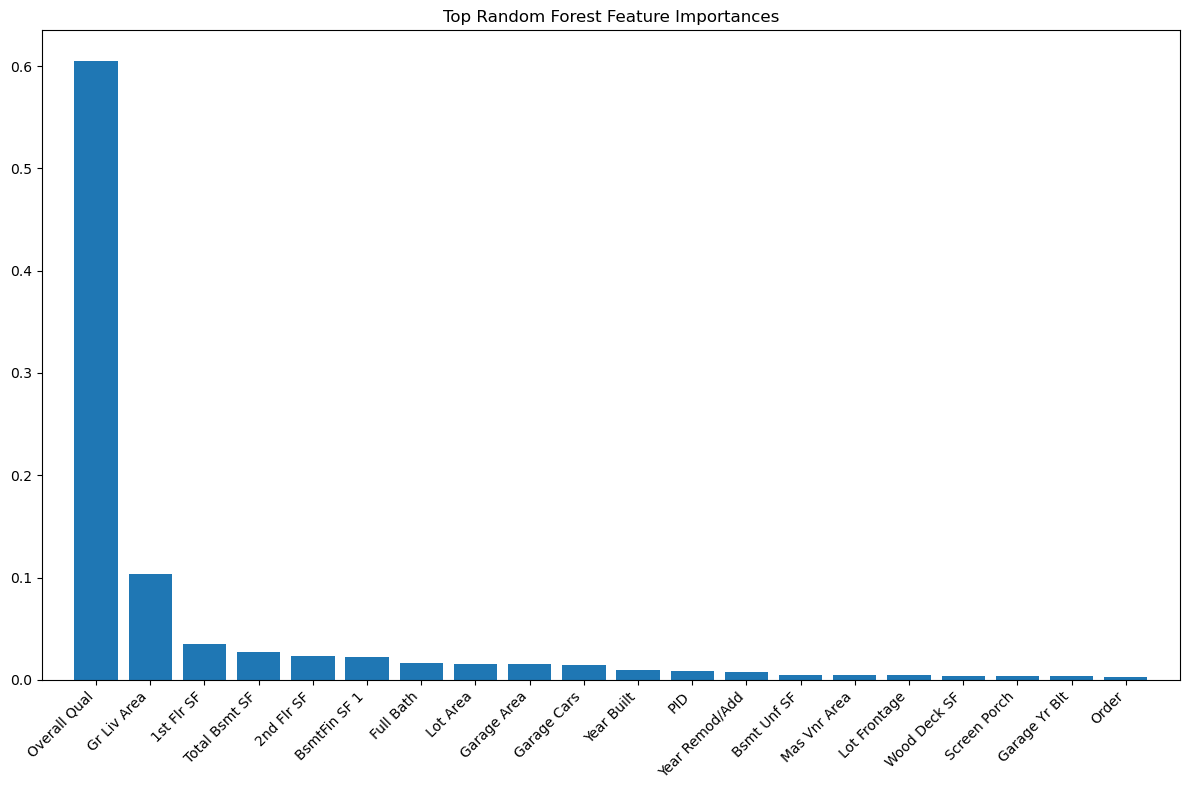

Random Forest RMSE: 26638.51


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def random_forest_model(file_path, target_variable, top_n=20):
    """
    Trains a Random Forest Regressor on the dataset specified by the file path, 
    plots the feature importances, and evaluates the model performance.

    Parameters:
    ----------
    file_path : str
        The file path to the CSV dataset containing the housing data.
        
    target_variable : str
        The name of the target variable in the dataset (e.g., 'SalePrice').
        
    top_n : int, optional
        The number of top features to display in the importance plot. Default is 20.
    
    Returns:
    -------
    float
        The Root Mean Squared Error (RMSE) of the Random Forest model.

    Example:
    --------
    >>> rmse = random_forest_model('AmesHousing.csv', 'SalePrice')
    >>> print(f"RMSE: {rmse:.2f}")
    """
    
    # Load dataset
    data = pd.read_csv(file_path)

    # Cleaning the dataset (handling missing values, etc.)
    def clean_data(df):
        # Fill missing values with the median for numeric columns
        for col in df.select_dtypes(include=['float64', 'int64']).columns:
            df[col].fillna(df[col].median(), inplace=True)
            
        # Convert categorical variables to dummy/indicator variables
        df = pd.get_dummies(df, drop_first=True)
        
        return df

    # Clean the data
    cleaned_data = clean_data(data)

    # Splitting features and target
    X = cleaned_data.drop(target_variable, axis=1)
    y = cleaned_data[target_variable]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)

    # Feature Importance for Random Forest
    importance = rf.feature_importances_
    indices = np.argsort(importance)[::-1]

    # Limit to top N features
    if top_n > len(indices):
        top_n = len(indices)

    # Plotting Feature Importance
    plt.figure(figsize=(12, 8))  # Adjusted figure size
    plt.title("Top Random Forest Feature Importances")
    plt.bar(range(top_n), importance[indices[:top_n]], align='center')
    plt.xticks(range(top_n), X.columns[indices[:top_n]], rotation=45, ha='right')
    plt.xlim([-1, top_n])
    plt.tight_layout()
    plt.show()

    # Evaluate model performance
    y_pred_rf = rf.predict(X_test)
    rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

    # Display Random Forest RMSE
    print(f'Random Forest RMSE: {rmse_rf:.2f}')
    
    return rmse_rf

# Example usage:
rmse = random_forest_model('AmesHousing.csv', 'SalePrice')
print(f"RMSE: {rmse:.2f}")


C:\Users\prashant.bidarakundi\AppData\Local\Temp\ipykernel_48060\2272324131.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Random Forest Regression RMSE: 26638.51


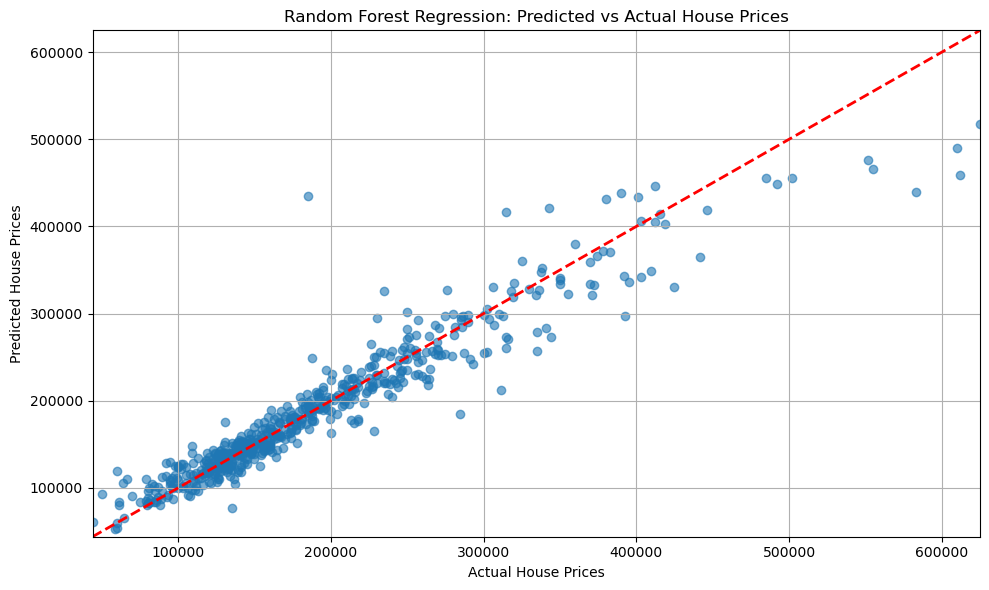

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def random_forest_regression(file_path, target_variable):
    """
    Trains a Random Forest Regressor on the dataset specified by the file path, 
    evaluates the model performance, and plots predicted vs actual prices.

    Parameters:
    ----------
    file_path : str
        The file path to the CSV dataset containing the housing data.
        
    target_variable : str
        The name of the target variable in the dataset (e.g., 'SalePrice').
    
    Returns:
    -------
    float
        The Root Mean Squared Error (RMSE) of the Random Forest model.

    Example:
    --------
    >>> rmse = random_forest_regression('AmesHousing.csv', 'SalePrice')
    >>> print(f"RMSE: {rmse:.2f}")
    """
    
    # Load dataset
    data = pd.read_csv(file_path)

    # Cleaning the dataset (handling missing values, etc.)
    def clean_data(df):
        """
        Cleans the dataset by filling missing values and converting categorical variables.
        
        Parameters:
        ----------
        df : DataFrame
            The pandas DataFrame to clean.
        
        Returns:
        -------
        DataFrame
            The cleaned DataFrame.
        """
        # Fill missing values with the median for numeric columns
        for col in df.select_dtypes(include=['float64', 'int64']).columns:
            df[col].fillna(df[col].median(), inplace=True)
            
        # Convert categorical variables to dummy/indicator variables
        df = pd.get_dummies(df, drop_first=True)
        
        return df

    # Clean the data
    cleaned_data = clean_data(data)

    # Splitting features and target
    X = cleaned_data.drop(target_variable, axis=1)
    y = cleaned_data[target_variable]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest Regression
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    # Calculate RMSE
    rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

    # Display RMSE
    print(f'Random Forest Regression RMSE: {rmse_rf:.2f}')

    # Plotting Predicted vs Actual Prices
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_rf, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('Random Forest Regression: Predicted vs Actual House Prices')
    plt.xlabel('Actual House Prices')
    plt.ylabel('Predicted House Prices')
    plt.xlim([y_test.min(), y_test.max()])
    plt.ylim([y_test.min(), y_test.max()])
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    return rmse_rf

# Example usage:
rmse = random_forest_regression('AmesHousing.csv', 'SalePrice')
print(f"RMSE: {rmse:.2f}")


### Step 5: Conclusion

In summary, stating that "the Random Forest model provided a more accurate prediction of house prices compared to Linear Regression" is grounded in the analysis of performance metrics, acknowledging the strengths and weaknesses of each modeling approach. This emphasizes the importance of selecting the right model based on the data characteristics and the specific prediction task at hand.